


# Project: Investigate a Dataset - Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

>● ‘Neighborhood’ indicates the
location of the hospital.

>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

>● 'SMS_received' indicates whether or not the patient received a reminder message


## Questions to Ask

1. Which gender showed up the most for their appointments?
2. What are the locations with the highest number of patients?
3. Which Age group had the most appointments?
4. Which age group showed up for appointments most frequently?
5. Which age group was most likely to miss an appointment?
4. Is any neighborhood associated with older or younger patients?
5. Were people enroled in the brazillian welfare program ('scholarship') more likely to show up for their appontments?
6. Did people who received SMS show up more for their appointments? 
7. Which Neighborhood hospital had the most handicaps? Is there an indication that there is a special hospital for handicaps?


In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use matplotlib inline to ensure that visualizations are plotted inline with the notebook. 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The data is available to us as a csv file so we will explore it with pandas

In [2]:
# Loading the data into a pandas DataFrame 
df_health = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df_health.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_health.shape

(110527, 14)

There are 110526 rows and 14 columns. Now let's look at the data type for each column

In [5]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values, sweet!

 However, The columns for scholarship, Hipertension (Hypertension lol), Diabetes, Alcoholism, Handcap (Handicap🤦‍♂️😂) and SMS_received are categorical and not supposed to be int type. 
 
Also, mathematical operations should not be done on the Patient and Appointment ID and so they can't be float or int. Let's fix these

In [6]:
df_health.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df_health[['AppointmentID', 'PatientId', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']] = \
df_health[['AppointmentID', 'PatientId', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].astype(object)

Check to confirm that the changes have been made

In [8]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  object
 8   Hipertension    110527 non-null  object
 9   Diabetes        110527 non-null  object
 10  Alcoholism      110527 non-null  object
 11  Handcap         110527 non-null  object
 12  SMS_received    110527 non-null  object
 13  No-show         110527 non-null  object
dtypes: int64(1), object(13)
memory usage: 11.8+ MB


Now let's check for duplicate values. We don't want to be redundant, do we?

In [9]:
df_health.duplicated().sum()

0

No Duplicates! This is my lucky day. Now let's just get an overview of the data

In [10]:
df_health.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Hmm. What do we have here? The Minimum age -1? How could that be? Is that some antenatal type situation? Let's see how many appointments are like that

In [11]:
df_health[df_health['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I don't know, I'll just drop that information since it's just one row. Nothing could go wrong, right?

In [12]:
df_health = df_health[df_health['Age'] != -1]

Now let's see

In [13]:
df_health.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Awesome. One more thing. I'd like to put the patients into age groups and see how useful that would be for analysis. 0-9 in a group, 10-19, 20-29 etc.

In [14]:
#First make a list of age boundaries
age_boundaries = [-1,9,19,29,39,49,59,69,79,89,99, 116]

#Then make names for the age groups
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

#Now create the age groups in the dataframe
df_health['Age_group'] = pd.cut(df_health['Age'], age_boundaries, labels = age_groups)



I made the bouldary start from -1 because if I put it at zero, all the babies aged 0 (about 3000 records) will be thrown away 😭😭. It has no relationship with the -1 which we have just dropped. This is also why I used 116 for the highest boundary while the highest age in this data is 115

In [15]:
df_health.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_group
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69
3,867951213174.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9
4,8841186448183.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59


Let's confirm that there are no null values

In [16]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110526 non-null  object  
 1   AppointmentID   110526 non-null  object  
 2   Gender          110526 non-null  object  
 3   ScheduledDay    110526 non-null  object  
 4   AppointmentDay  110526 non-null  object  
 5   Age             110526 non-null  int64   
 6   Neighbourhood   110526 non-null  object  
 7   Scholarship     110526 non-null  object  
 8   Hipertension    110526 non-null  object  
 9   Diabetes        110526 non-null  object  
 10  Alcoholism      110526 non-null  object  
 11  Handcap         110526 non-null  object  
 12  SMS_received    110526 non-null  object  
 13  No-show         110526 non-null  object  
 14  Age_group       110526 non-null  category
dtypes: category(1), int64(1), object(13)
memory usage: 12.8+ MB


Awesome. Now let's take a deep dive into the data. Brace up!



### Data Cleaning: Rename Columns

Hold up. Before the dive, let's now rename the 'No-show' column. Leaving it like this will make retriving data from it in future, somewhat tedious. We'll change the hyphen to an underscore

In [17]:
df_health = df_health.rename(columns = {'No-show': 'No_show'})
df_health.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show',
       'Age_group'],
      dtype='object')

Good, Now let's explore

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which gender showed up the most for their appointments?

Let's first see the gender distribution

In [18]:
df_health['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

So there's a lot more women than men here. To get an accurate overview, we'll have to look at the proportion of eacy gender who showed up and not just the count

In [19]:
#TO get a dataFrame containing only those who went for their appointments
df_show_up = df_health.query( "No_show== 'No' ")

If we hadn't changed the 'No-show' column name to 'No_show', we would have gotten an error at this stage

In [20]:
show_up_by_gender =df_show_up['Gender'].value_counts()/df_health['Gender'].value_counts()

This gives us the proportion of patients showing up to appointments, broken down by gender

In [21]:
show_up_by_gender*100

F    79.685129
M    80.032052
Name: Gender, dtype: float64

Now let's put this on a bar chart

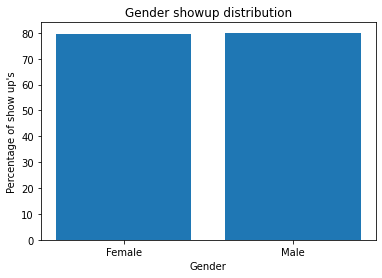

In [22]:
plt.bar(['Female', 'Male'], show_up_by_gender*100)
plt.xlabel('Gender')
plt.ylabel("Percentage of show up's")
plt.title("Gender showup distribution")
plt.show()

The difference isn't quite clear. Let's try a line plot

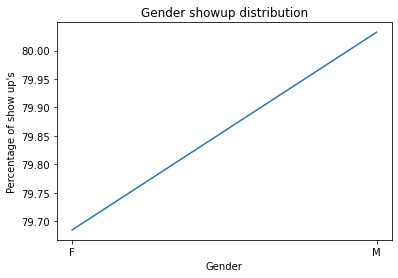

In [23]:
plt.plot(show_up_by_gender*100)
plt.xlabel('Gender')
plt.ylabel("Percentage of show up's")
plt.title("Gender showup distribution")

plt.show()

There. We see that roughly 80% of both genders showed up for their appointments with men showing up just slightly more

### Research Question 2:  What are the locations with the highest number of patients?

Here we want to find the neighborhood hospitals with the highest number of patients (Not appointments)

In [25]:
# Count number of unique patient IDs per neighbourhood
unique_patients_per_neighborhood = df_health.groupby('Neighbourhood')['PatientId'].nunique().sort_values(ascending = True)
unique_patients_per_neighborhood.sort_values(ascending=False)

Neighbourhood
JARDIM CAMBURI                 4192
MARIA ORTIZ                    3336
JARDIM DA PENHA                2406
RESISTÊNCIA                    2373
ITARARÉ                        2136
                               ... 
ILHA DO BOI                      22
AEROPORTO                         7
ILHA DO FRADE                     5
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: PatientId, Length: 81, dtype: int64

Let's see the highest 10

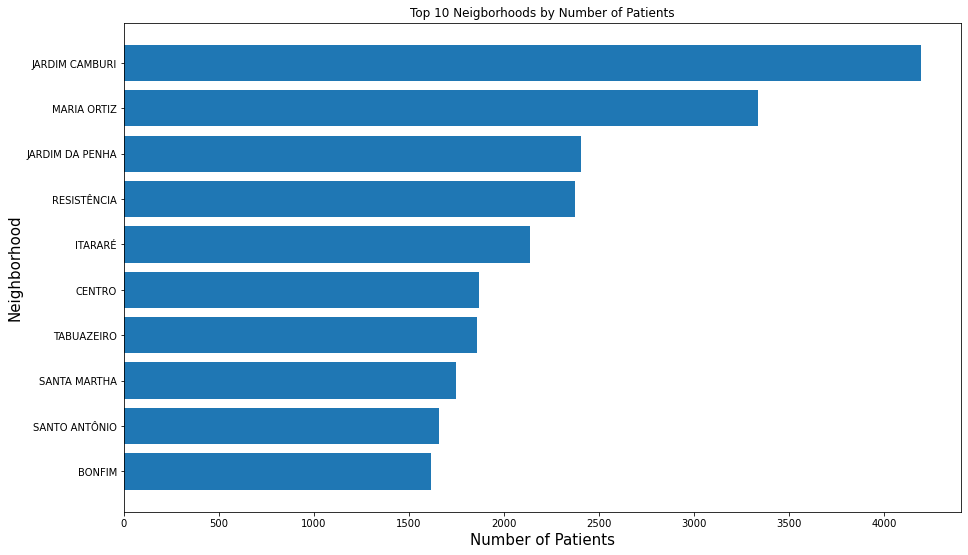

In [26]:
plt.subplots(figsize = (15, 9))
plt.barh(y = unique_patients_per_neighborhood[-10:].index, width = unique_patients_per_neighborhood[-10:])
plt.xlabel('Number of Patients',fontsize = 15)
plt.ylabel('Neighborhood', fontsize = 15)
plt.title('Top 10 Neigborhoods by Number of Patients');

So Jardim Camburi seems to be the busiest hospital

### Research Question 3: Which age group had the most appointments?


We already saw that women have more appointments than men. Quite reasonable since they have a wider variety of medical needs. However, Which age group came to hospital most often? Is it the grandparents? Lets find out.

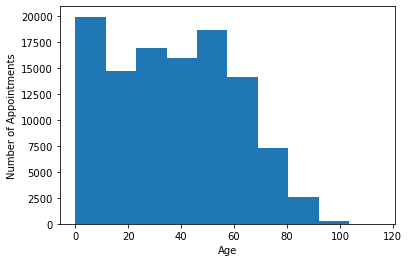

In [27]:
#A histogram will do the job for us
plt.hist(df_health['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

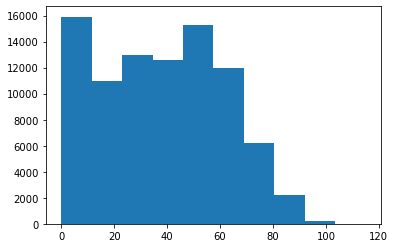

In [28]:
plt.hist(df_show_up['Age']);

We see that Chidren between the ages of 0 and 10 had the most appointments, followed by people between 50 and 60. So it isn't the grandparents, huh

### Research Question 4: Which age group showed up for appointments most frequently?


I see. Here's definetely where the grandparents should stand out since they require lots of medical attention. We want to see the average numer of appointments per person in each age group

In [29]:
#Find the number of patients in each age group
patients_age_group = df_health.groupby('Age_group')['PatientId'].nunique()
patients_age_group
#If we use count in place of nunique,
#it will count some patients more than once because of multiple appearance (multiple appointments)

Age_group
0-9      10596
10-19     7429
20-29     7625
30-39     8165
40-49     7667
50-59     8720
60-69     6724
70-79     3510
80-89     1730
90-99      241
100+         7
Name: PatientId, dtype: int64

In [30]:
#Find the number of appointments made by each age group
appointments_age_group = df_health.groupby('Age_group')['AppointmentID'].count()
appointments_age_group

Age_group
0-9      17475
10-19    12936
20-29    13699
30-39    15171
40-49    14209
50-59    15863
60-69    11876
70-79     5934
80-89     2946
90-99      406
100+        11
Name: AppointmentID, dtype: int64

In [31]:
df_health.groupby('Age_group')[df_health.columns].count().sum()

PatientId         110526
AppointmentID     110526
Gender            110526
ScheduledDay      110526
AppointmentDay    110526
Age               110526
Neighbourhood     110526
Scholarship       110526
Hipertension      110526
Diabetes          110526
Alcoholism        110526
Handcap           110526
SMS_received      110526
No_show           110526
Age_group         110526
dtype: int64

In [32]:
len(df_health)

110526

In [33]:
appointments_age_group.sum()

110526

In [34]:
Appointment_frequency_age_group = appointments_age_group/patients_age_group
Appointment_frequency_age_group

Age_group
0-9      1.649207
10-19    1.741284
20-29    1.796590
30-39    1.858053
40-49    1.853267
50-59    1.819151
60-69    1.766211
70-79    1.690598
80-89    1.702890
90-99    1.684647
100+     1.571429
dtype: float64

This should look great on a bar chart. Let's make a function to plot this kind of data on a bar chart because I'd like us to do another exploration of this sort in future.

In [35]:
def age_compare_bar(series = None, figures = 2, add_annotate = '', xlabel = None, ylabel = 'Age Group', title = None):
    plt.subplots(figsize = (15,6))
    y = list(range(len(series)))
    plt.barh(y = y, width = series, tick_label = series.index)
    for position in y:
        plt.annotate(str(round(series[position], figures))+ add_annotate, xy=(series[position],y[position]))
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show()

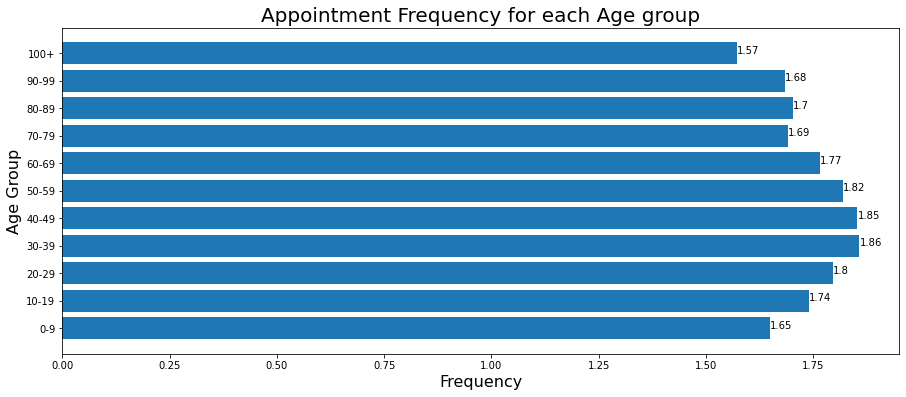

In [36]:
age_compare_bar(series = Appointment_frequency_age_group,
                xlabel = 'Frequency',
                title = 'Appointment Frequency for each Age group')

Interestingly, the people above 100 years old have the least appointment frequency! They probably have some form of home treatment because my 95 year old granny needs medical attention quite frequently. Also, The thirties have the highest frequency! This is so not what I'd have guessed. Well, now we know.

### Research Question 5: Which age group was most likely to miss an appointment?


My guess is, The working class people. Reason: Work. 

To Make things easy, we'll make a new dataframe, containing only people who missed their appointments

In [37]:
df_no_show = df_health.query("No_show == 'Yes'")

In [38]:
# count the number of no_shows for each age group
no_show_age_group = df_no_show.groupby('Age_group')['AppointmentID'].count()
no_show_age_group

Age_group
0-9      3484
10-19    3257
20-29    3380
30-39    3300
40-49    2880
50-59    2776
60-69    1790
70-79     902
80-89     465
90-99      82
100+        3
Name: AppointmentID, dtype: int64

In [39]:
#divide the number of no shows by the number of appointments to get the proportion of appointments which were no shows
no_show_proportion_age_group = (no_show_age_group/appointments_age_group)*100
no_show_proportion_age_group

Age_group
0-9      19.937053
10-19    25.177798
20-29    24.673334
30-39    21.752027
40-49    20.268844
50-59    17.499842
60-69    15.072415
70-79    15.200539
80-89    15.784114
90-99    20.197044
100+     27.272727
Name: AppointmentID, dtype: float64

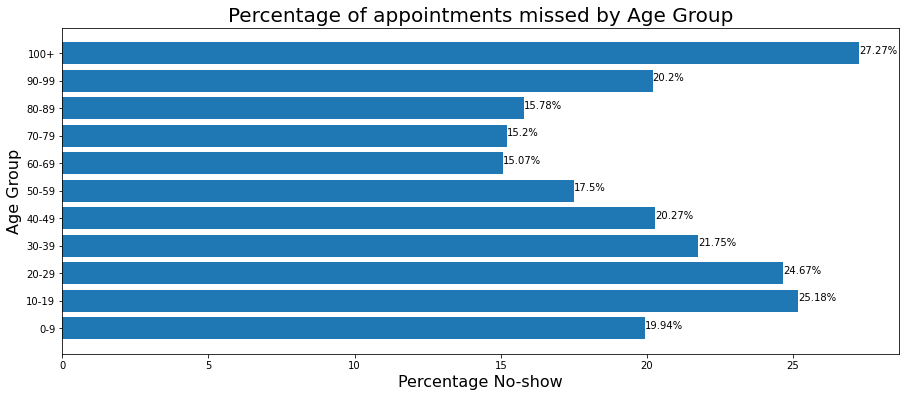

In [40]:
age_compare_bar(series = no_show_proportion_age_group, add_annotate='%',
                figures=2,
                xlabel = 'Percentage No-show',
                title = 'Percentage of appointments missed by Age Group')

Unsuprisingly, The people aged over 100 missed a quite significant proportion of their appointments. Give them a break, moving around at that age isn't the most pleasant thing.

It is surprising however that the young people between 10 and 20 missed a quarter of their appointments. The 30-50 year olds defied my expectations, again😌. Those between 60-80 missed the least appointments. Is that the period in life where the fear of passing on is strongest? lol

### Research Question 6: Is any neighborhood associated with older or younger patients?


Let's see if there are any "old people's homes" included in our available list of hospital neighborhood. A scatterplot of age distribution should give us an idea

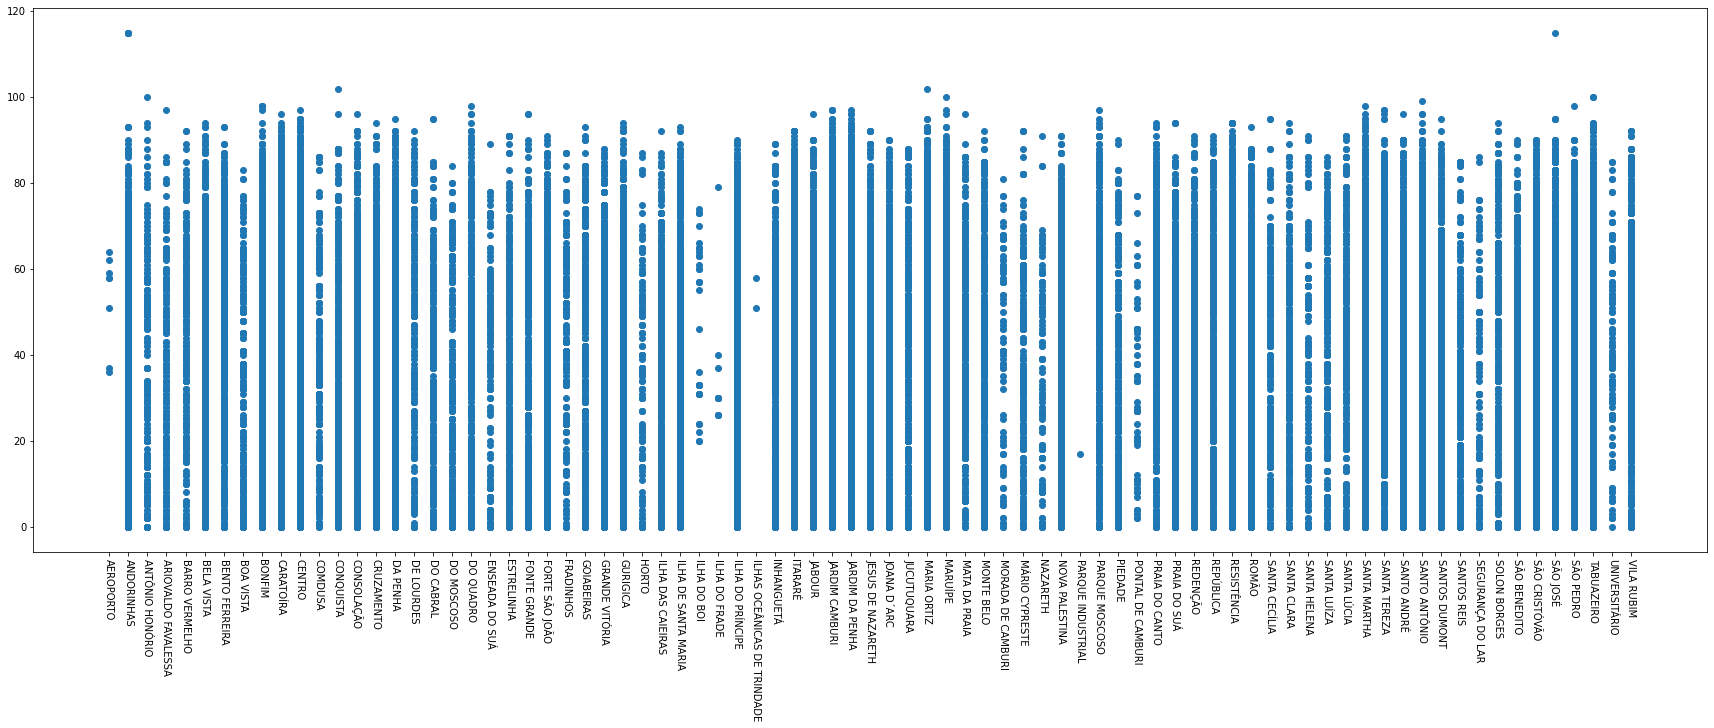

In [41]:
plt.subplots(figsize = (30, 10))
plt.scatter(x = df_health['Neighbourhood'].sort_values(), y = df_health.sort_values(by = 'Neighbourhood')['Age'])
plt.xticks(rotation = -90);

There doesn't seem to be any old people's homes as there isn't a distictly clear variation in age distribution between the hospitals

### Research Question 7: Were people enroled in the brazillian welfare program ('scholarship') more likely to show up for their appontments?


In [42]:
#This displays the percentage of appointments not showed up for, generally
(df_health['No_show'].value_counts()/len(df_health))*100

No     79.806561
Yes    20.193439
Name: No_show, dtype: float64

Don't get confused. If No_show is 'No', it means that the person did show up. If No_Show is 'Yes', the person didn't show up

In [43]:
df_scholarship = df_health.query( "Scholarship== 1 ")
scholarship_show = df_scholarship['No_show'].value_counts()/len(df_scholarship)
scholarship_show*100
#This displays the percentage of appointments either showed up for or not by people on the healthcare scheme

No     76.263696
Yes    23.736304
Name: No_show, dtype: float64

In [44]:
df_no_scholarship = df_health.query( "Scholarship== 0 ")
no_scholarship_show = df_no_scholarship['No_show'].value_counts()/len(df_no_scholarship)
no_scholarship_show.round(3)
#This displays the percentage of appointments either showed up for or not by people NOT on the healthcare scheme

No     0.802
Yes    0.198
Name: No_show, dtype: float64

Now let's represent this on a bar chart

I made a function to plot this kind of comparative graph since I used the same pattern more than once. Here it is

In [45]:
def compare_bar(series_a, series_b, xlabel, ylabel, title, legend_a, legend_b):

    labels = list(series_a.index)
    positions = np.array(range(len(labels)))

    heights = list(series_a.values)
    width = 0.2
    
    plt.bar(positions + width/2, heights , tick_label = labels,
            width = width, label = legend_a )
    plt.legend();


    labels = list(series_b.index)
    positions = np.array(range(len(labels)))

    heights = list(series_b.values)
    width = 0.2
    plt.bar(positions + width*1.5, heights , tick_label = labels, 
            width = width, label = legend_b )
    plt.xlabel(xlabel, fontsize = 16)
    plt.xticks(rotation = 90)
    plt.ylabel(ylabel, fontsize = 16)
    plt.yticks(ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], labels = [10,20,30,40,50,60,70,80,90]);
    plt.title(title, fontsize = 22)
    plt.legend();
    


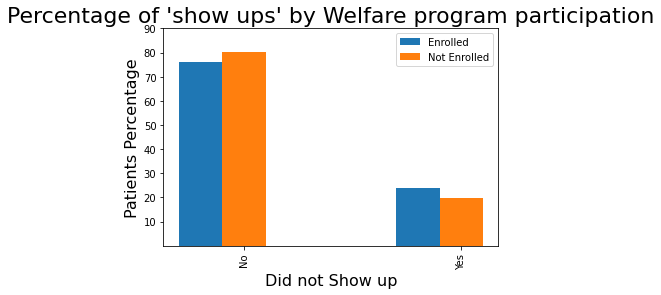

In [46]:
compare_bar(scholarship_show, no_scholarship_show, 'Did not Show up', 'Patients Percentage',
            "Percentage of 'show ups' by Welfare program participation", legend_a= 'Enrolled', legend_b='Not Enrolled')

80.2% of people who aren't enrolled in the welfare program showed up for their appointments. For people who were enrolled, the show up rate was 76.2%''So people who enrolled in the program did show up less. Not suprising at all.

### Research Question 8: Did people who received SMS show up more for their appointments? 


Here, we'll need to seperate those who received SMS from those who didn't

In [47]:
#Subset Dataframe of thosw who received sms
df_sms = df_health[df_health['SMS_received']== 1]

#Thiose who didn't receive is all others
df_no_sms = df_health.drop(index=df_sms.index)
received_sms = df_sms['No_show'].value_counts()/len(df_sms)

not_received_sms = df_no_sms['No_show'].value_counts()/len(df_no_sms)


In [48]:
received_sms
#This displayed the percentage of people who received sms. No means the person showed up

No     0.724255
Yes    0.275745
Name: No_show, dtype: float64

In [49]:
not_received_sms

No     0.832965
Yes    0.167035
Name: No_show, dtype: float64

Now, the bar plot

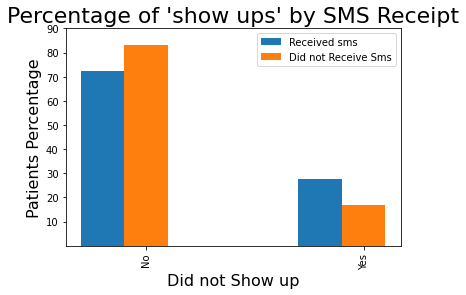

In [50]:
compare_bar(received_sms, not_received_sms, 'Did not Show up', 'Patients Percentage',
            "Percentage of 'show ups' by SMS Receipt", legend_a= 'Received sms', legend_b='Did not Receive Sms')

I honestly thought an SMS would make you more likely to show up for an appointment. Funny enough, that is not the case gere. People who received SMS showed up less frequently than people who didn't. Quite interesting

### Research Question 9: Which Neighborhood hospital had the most handicaps? Is there an indication that there is a special hospital for handicaps?


In [51]:
#Create new dataframe containing only patients who are handicaped
df_handicap = df_health[df_health["Handcap"] != 0]
df_health['Handcap'].value_counts()
df_handicap['Handcap'].value_counts()

count_handicap_per_neighborhood = df_handicap.groupby('Neighbourhood')['PatientId'].count().sort_values(ascending = True)
count_handicap_per_neighborhood.sort_values(ascending=False)

Neighbourhood
SANTA MARTHA       103
SANTO ANTÔNIO      101
RESISTÊNCIA         88
CENTRO              86
ANDORINHAS          81
                  ... 
MONTE BELO           2
SANTA LÚCIA          2
SANTOS REIS          1
ANTÔNIO HONÓRIO      1
COMDUSA              1
Name: PatientId, Length: 70, dtype: int64

In [52]:
no_of_handicaps_per_neigh = df_handicap.groupby('Neighbourhood')['PatientId'].nunique().sort_index()

In [53]:
no_of_patients = df_health.groupby('Neighbourhood')['PatientId'].nunique().sort_index()

In [54]:
percentage_handicap_by_neighborhood = (no_of_handicaps_per_neigh/no_of_patients).sort_values(ascending  = True)*100
percentage_handicap_by_neighborhood.dropna(inplace = True)

In [55]:
top_10_handicap_neigbhorhood = percentage_handicap_by_neighborhood[-10:]
top_10_handicap_neigbhorhood

Neighbourhood
GRANDE VITÓRIA    3.317536
SANTA MARTHA      3.434459
DO CABRAL         3.470032
ENSEADA DO SUÁ    3.546099
SANTA TEREZA      3.612903
BELA VISTA        4.043127
DE LOURDES        4.545455
ESTRELINHA        5.177994
DO QUADRO         5.611222
MATA DA PRAIA     7.493540
Name: PatientId, dtype: float64

Let's plot this

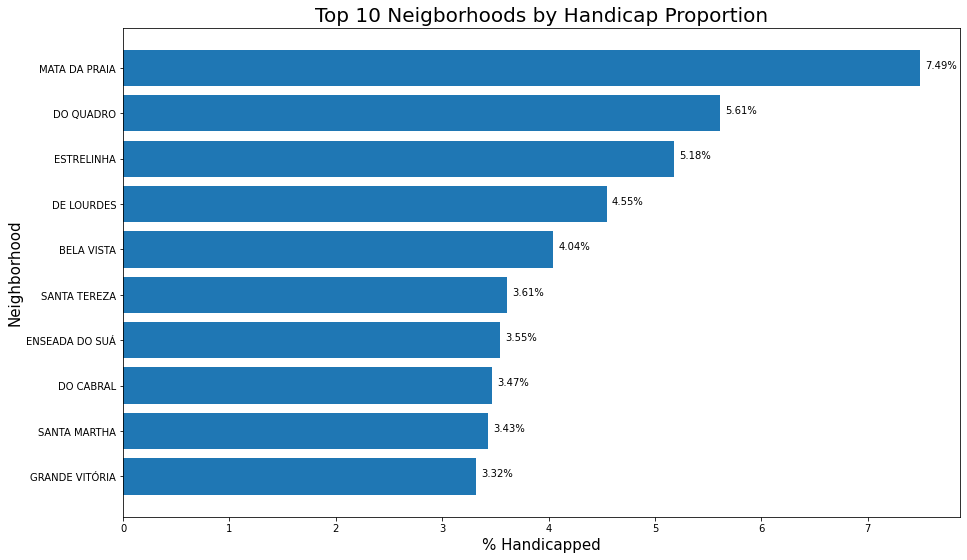

In [56]:
plt.subplots(figsize = (15, 9))
y = list(range(len(top_10_handicap_neigbhorhood)))
plt.barh(y = y, width = top_10_handicap_neigbhorhood, tick_label = top_10_handicap_neigbhorhood.index)
for position in y:
    plt.annotate(str(round(top_10_handicap_neigbhorhood[position] , 2))+ '%',
                 xy=(top_10_handicap_neigbhorhood[position] + 0.05,y[position]))
plt.xlabel('% Handicapped',fontsize = 15)
plt.ylabel('Neighborhood', fontsize = 15)
plt.title('Top 10 Neigborhoods by Handicap Proportion', fontsize = 20);

MATA DA PRAIA has the highest proportion of handicapped patients, at 7.5%. This however isn't high enough to be distinctly indicative of specialisation on handicaps

<a id='conclusions'></a>
## Conclusions



> We saw that there were a lot more females than males visiting the hospitals. We saw that about 80% of the people showed up for their appointments. We saw that people enrolled in the medical welfare program tend to be less likely to make their appointments.

> People older than 100 years were most likely to miss their appointment, followed by people aged between 10 and 20.

> People aged between 30 and 50 visited the hospitals most frequently.

>We also saw that people who received SMS were less likely to show up for their appointments

> Parting Words: Please note that the conclusions made here are done within the limits of my budding expertise and growing understanding and so should not be held absolute

## Limitations


Indepth statistical analysis was not carried out in here and so results should be strictly viewed as descriptive, with no prescriptive goals in mind.